### Monte Carlo - Euler Discretization - MSFT

In [1]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
from datetime import datetime 
%matplotlib inline

In [3]:
from iexfinance.stocks import Stock, get_historical_data

start = datetime(2018, 1, 1)
end = datetime(2023, 3, 24)

api_key = 'API_KEY'

In [7]:
tickers = ['MSFT']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = get_historical_data(t, start, end, output_format = 'pandas', token=api_key)['close']

In [26]:
sec_data

,MSFT
2018-01-02,85.95
2018-01-03,86.35
2018-01-04,87.11
2018-01-05,88.19
2018-01-08,88.28
...,...
2023-03-20,272.23
2023-03-21,273.78
2023-03-22,272.29
2023-03-23,277.66


In [22]:
log_returns = np.log(1 + sec_data.pct_change())
log_returns

,MSFT
2018-01-02,NaN
2018-01-03,0.004643
2018-01-04,0.008763
2018-01-05,0.012322
2018-01-08,0.001020
...,...
2023-03-20,-0.026105
2023-03-21,0.005678
2023-03-22,-0.005457
2023-03-23,0.019530


<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [9]:
r = 0.0351

In [10]:
stdev = log_returns.std()*250**0.5
stdev

MSFT    0.309515
dtype: float64

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
stdev = stdev.values
stdev

array([0.30951545])

In [13]:
T = 1.0
t_intervals = 250
delta_t = T/t_intervals

iterations = 10000

In [14]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = sec_data.iloc[-1]
S[0] = S0

In [15]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*Z[t])

In [16]:
S

array([[280.57      , 280.57      , 280.57      , ..., 280.57      ,
        280.57      , 280.57      ],
       [281.59188105, 291.90788654, 287.82268518, ..., 278.04706271,
        277.30585064, 276.46402475],
       [280.66180295, 280.52930973, 281.11283019, ..., 278.11840548,
        276.77645171, 274.39281064],
       ...,
       [238.50669278, 318.60514041, 238.4132347 , ..., 485.28499556,
        281.17354221, 286.9624814 ],
       [236.51727222, 315.46682236, 235.43414958, ..., 481.1817155 ,
        273.8779795 , 283.83615987],
       [227.53889445, 316.84258585, 241.88894147, ..., 484.6758584 ,
        275.11391697, 285.54997026]])

In [17]:
S.shape

(251, 10000)

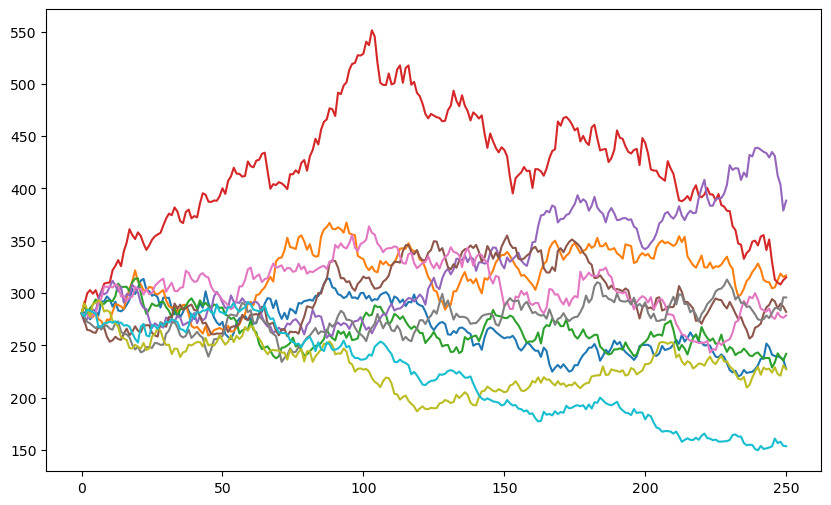

In [18]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10])

----

In [27]:
Payoff = np.maximum(S[-1] - 300, 0)
Payoff

array([  0.        ,  16.84258585,   0.        , ..., 184.6758584 ,
         0.        ,   0.        ])

In [28]:
Payoff.shape

(10000,)

In [30]:
Call = np.exp(-r * T) * np.sum(Payoff) / iterations
Call

31.126290126026735